In [1]:
import os
os.chdir("..")

In [2]:
import pandas as pd
import plotly.express as px

In [3]:
train_logs_df = pd.read_csv("./data/train-logs-dataframe/training_metrics.csv")
test_logs_df = pd.read_csv("./data/test-logs-dataframe/training_metrics.csv")

In [4]:
train_logs_df.head()

,metric,value,step
0,train/loss,0.6324,100.0
1,train/loss,0.6319,200.0
2,train/loss,0.6058,300.0
3,train/loss,0.5792,400.0
4,train/loss,0.5921,500.0


In [5]:
list(train_logs_df["metric"].unique())

['train/loss',
 'train/learning_rate',
 'train/epoch',
 'eval/loss',
 'eval/f1',
 'eval/precision',
 'eval/recall',
 'eval/runtime',
 'eval/samples_per_second',
 'eval/steps_per_second',
 'train/train_runtime',
 'train/train_samples_per_second',
 'train/train_steps_per_second',
 'train/total_flos',
 'train/train_loss']

### Training evaluation

In [6]:
train_loss_df = train_logs_df.loc[train_logs_df["metric"] == "train/loss"]
eval_loss_df = train_logs_df.loc[train_logs_df["metric"] == "eval/loss"]
loss_df = pd.concat([train_loss_df, eval_loss_df])

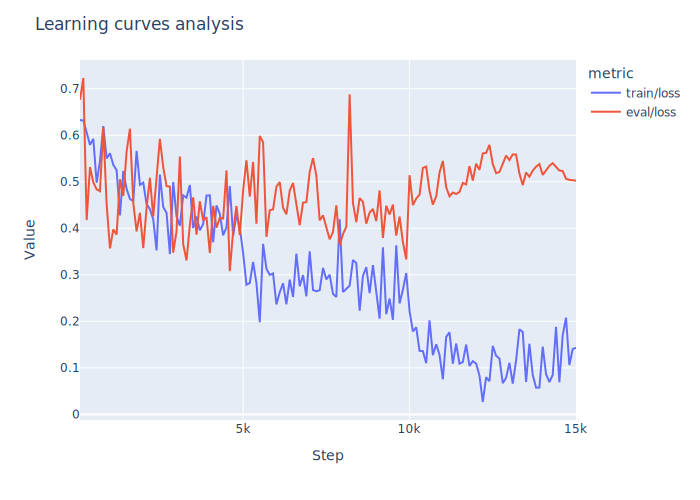

In [7]:
fig = px.line(loss_df, x="step", y="value", color="metric")
fig.update_layout(title="Learning curves analysis", xaxis_title="Step", yaxis_title="Value")
fig.show('svg')

Si sale una curva de entrenamiento con mucho ruido igual se podría probar a bajar un poco el Learning Rate. Vamos a observar como a evolucionado dicho parámetro durante el entrenamiento.

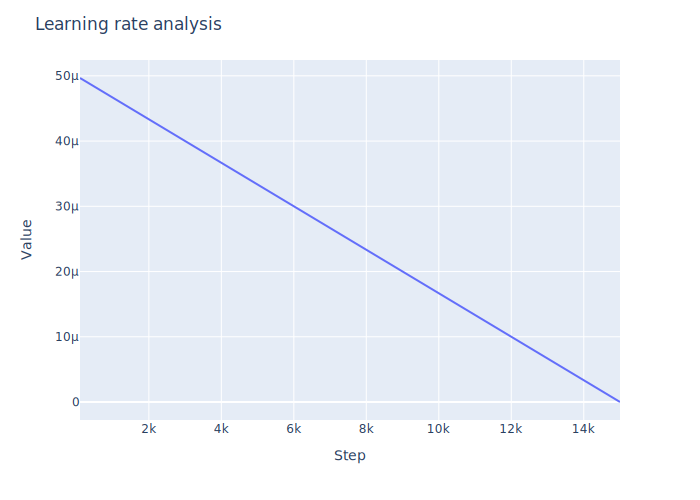

In [8]:
learning_rate_df = train_logs_df[train_logs_df["metric"] == "train/learning_rate"]
fig = px.line(learning_rate_df, x="step", y="value")
fig.update_layout(title="Learning rate analysis", xaxis_title="Step", yaxis_title="Value")
fig.show('svg')

In [17]:
train_metrics_df = train_logs_df.loc[train_logs_df["metric"].isin(["eval/precision", "eval/recall"])]

In [20]:
fig = px.line(train_metrics_df, x="step", y="value", color="metric")
fig.update_layout(title="Training precision and recall", xaxis_title="Step", yaxis_title="Value")
fig.show()

In [22]:
train_f1_df = train_logs_df.loc[train_logs_df["metric"] == "eval/f1"]
fig = px.line(train_f1_df, x="step", y="value", color="metric")
fig.update_layout(title="Training precision and recall", xaxis_title="Step", yaxis_title="Value")
fig.show()

### Model testing

In [10]:
test_logs_df = test_logs_df.loc[1:3, ["metric", "value"]]
test_logs_df['value'] = test_logs_df['value'].apply(lambda x: round(x, 2))

In [11]:
test_logs_df

,metric,value
1,eval/f1,0.89
2,eval/precision,0.90
3,eval/recall,0.88
